# <ins>Workshop 4</ins>: 

# Trees and Cross Validation

* **Classification**: A supervised machine learning method where the model is trained to predict the label of given input data accurately. This session will focus on traditional machine learning techniques and their practical applications.

<img src="https://i.gifer.com/Ckp3.gif" width="500" height="315" alt="Description of the image">

**<ins>Material generated by:</ins>** 
- Martina Cádiz Leyton
- Daniel Moreno Cartagena<br>

*Date: 06-12-2024*

---
---

This workshop will explore a variety of traditional classification algorithms and introduce advanced techniques such as k-fold cross-validation and grid search to optimize model parameters.

<ins>**Classification Techniques**</ins>

* **Binary and Multiclass Classification**: Dive into key techniques such as logistic regression, decision trees, and support vector machines (SVM). Discuss the different challenges and approaches for binary versus multiclass classification scenarios.

<ins>**Model Evaluation and Optimization**</ins>

* **k-Fold Cross-Validation**: Learn this robust method for estimating the model's performance by dividing the data into k smaller sets. This cross-validation technique ensures that every observation from the original dataset has the opportunity to be used in both training and testing phases, providing a well-rounded evaluation.

* **Grid Search**: Explore this technique for tuning algorithm parameters to find the most effective settings for your model. This involves an exhaustive search over a specified parameter grid that you define, aiming to discover the optimal combination that enhances model performance.

<ins>**Visualization of Results**</ins>

* **Confusion Matrix**: Gain a clear understanding of model performance with confusion matrices, which visualize the accuracy of predictions by comparing the predicted labels with the true labels. This matrix is especially useful for identifying misclassifications and assessing the effectiveness of binary and multiclass classification models.


<ins>**Library for Classification using Machine Learning Algorithms**</ins>

* **Scikit-learn**: A versatile and widely-used library for machine learning in Python. It provides efficient tools for a wide range of data mining and analysis tasks, including classification with logistic regression, decision trees, and SVMs.

# Classification

We will use the same dataset as the last workshop, which corresponds to the Heart Failure Prediction Problem, but this time we are going to employ Trees and Grid Search.

<ins> **Context** </ins>

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

<ins> **The Attributes include:** </ins>

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("./dataset/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [4]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [5]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(df[string_col])

columns = encoder.get_feature_names_out(string_col)

# Create column names based on the unique categories
columns = encoder.get_feature_names_out(string_col)
encoded_df = pd.DataFrame(encoded_data, columns=columns)

df_non_categorical = df.drop(string_col, axis=1)
final_df = pd.concat([df_non_categorical, encoded_df], axis=1)

X = final_df.drop('HeartDisease', axis=1)  # Features
y = final_df['HeartDisease']  # Target variable

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)

print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (734, 20)
y_train shape (734,)
X_test shape (184, 20)
y_test shape (184,)


## Random Forest (Trees)

Using [Random Forest Classifier (sklearn)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

- **n_estimators**: Number of trees in the forest.
- **max_features**: Number of features to consider for each split.
- **max_depth**: Maximum depth of each tree.
- **min_samples_split**: Minimum number of samples required to split a node.
- **min_samples_leaf**: Minimum number of samples required at a leaf node.
- **bootstrap**: Whether to use bootstrapping for creating tree samples.

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
clf_rfc = RandomForestClassifier(n_estimators=200, criterion="entropy")
clf_rfc.fit(X_train, y_train)
y_pred = clf_rfc.predict(X_test)

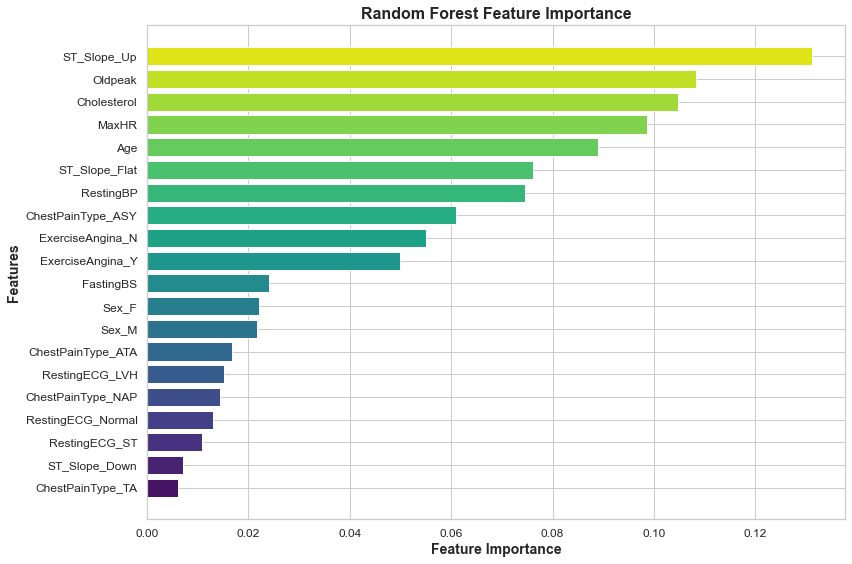

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  

importance = clf_rfc.feature_importances_
idxs = np.argsort(importance)


sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
plt.barh(np.arange(len(idxs)), importance[idxs], color=sns.color_palette("viridis", len(idxs)))
plt.yticks(np.arange(len(idxs)), [X_train.columns[i] for i in idxs])


plt.xlabel('Feature Importance', fontsize=14, fontweight='bold')
plt.ylabel('Features', fontsize=14, fontweight='bold')
plt.title('Random Forest Feature Importance', fontsize=16, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### (To Do) Calculate the metrics

## Cross Validation and Grid Search

Let's try using just one model (one should search for the best hyperparameters across all models and then compare them).

What is Cross Validation?

<img src="https://scikit-learn.org/0.24/_images/grid_search_cross_validation.png" alt="drawing" width="500" height="400">

GridSearch is not Cross Validation (this is a common misconception), but it is used to integrate Cross Validation along with several hyperparameters that one wishes to combine.

In [10]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

# Hyperparameters optimization and cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [11]:
# Parametros evaluados
param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100, 1000],  # Regularization strength
    'penalty': ['l2'],  # Type of regularization, L2 is the most common for logistic regression
    'solver': ['lbfgs', 'newton-cg', 'sag'],  # Efficient solvers for large datasets and L2 penalty
    'max_iter': [100, 200, 500],  # Maximum number of iterations taken for the solvers to converge
    'l1_ratio': [None, 0.25, 0.5, 0.75] # The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1
}

# k-Fold cross validation
cv = KFold(n_splits=5, 
           random_state=1, 
           shuffle=True)

# Hyperparameters tuning
model = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring="f1_macro",
    verbose=10,
    n_jobs=-1,
    cv=cv
    )

# Entrenamiento
model.fit(X_train, y_train)
print(model.best_score_)
print(model.best_estimator_.get_params())

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
0.8653931928044518
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [12]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [14]:
print('acc:', accuracy_score(y_test, y_pred))
print('f1-score:', f1_score(y_test, y_pred, average='macro'))

acc: 0.8532608695652174
f1-score: 0.8509316770186335


### (To Do) Do the same, but now using Random Forest